In [12]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
titanic_df = pd.read_csv('datasets/titanic_train.csv')
titanic_test = pd.read_csv('datasets/titanic_test.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic_df.shape

(891, 12)

In [15]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
titanic_df = titanic_df.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)
titanic_test = titanic_test.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)

In [21]:
titanic_df.shape

(891, 8)

In [17]:
titanic_test.shape

(418, 7)

In [18]:
titanic_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [19]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [22]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [23]:
titanic_df[titanic_df.isnull().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [24]:
titanic_df['Age'].isnull().sum()

177

In [26]:
#replacing missing age with median of Ages.
median_age = titanic_df['Age'].median()
print('Median Age is ', median_age)

Median Age is  28.0


In [29]:
titanic_df['Age'].replace(np.nan,median_age,inplace=True)
titanic_df['Age'].isnull().sum()

0

In [30]:
titanic_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [31]:
median_age = titanic_test['Age'].median()
print('Median Age in Test dataset is ',median_age)

Median Age in Test dataset is  27.0


In [32]:
#Replacing missing ages in test dataset with Median age
titanic_test['Age'].replace(np.nan,median_age,inplace=True)
titanic_test['Age'].isnull().sum()

0

In [33]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [34]:
titanic_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [35]:
#Dropping rows with nulls in both test and train datasets
titanic_df=titanic_df.dropna()
titanic_test=titanic_test.dropna()


In [36]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
titanic_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [38]:
titanic_df.shape

(889, 8)

In [39]:
titanic_test.shape

(417, 7)

In [40]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
titanic_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000
mean,2.263789,29.525180,0.448441,0.393285,35.627188
std,0.842077,12.628258,0.897568,0.982419,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


### Exploratory Analysis

#### Relation between Sex and Survived

In [46]:
pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])

Survived,0,1
Sex,,
female,81,231
male,468,109


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

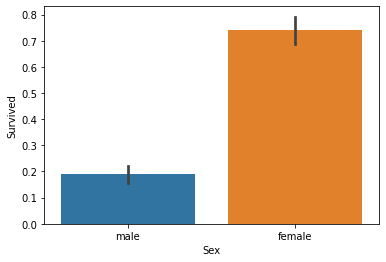

In [48]:
sns.barplot(x = titanic_df['Sex'],
            y = titanic_df['Survived'],
            data = titanic_df)

#### Relation between Class and Survived

In [49]:
pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

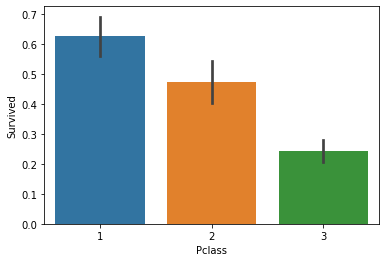

In [54]:
sns.barplot(x = titanic_df['Pclass'],
            y = titanic_df['Survived'],
            data = titanic_df)

#### Correlation between all features

In [58]:
titanic_corr = titanic_df.corr()
titanic_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193
Age,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707
SibSp,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000


<AxesSubplot:>

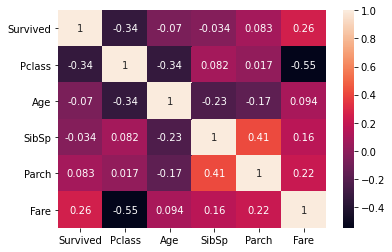

In [65]:
sns.heatmap(titanic_corr,annot=True)

### Pre-Processing

#### Convert categorical values to ordered Integer values

In [69]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))

titanic_df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
143,0,3,1,19.0,0,0,6.7500,Q
630,1,1,1,80.0,0,0,30.0000,S
99,0,2,1,34.0,1,0,26.0000,S
646,0,3,1,19.0,0,0,7.8958,S
216,1,3,0,27.0,0,0,7.9250,S


In [74]:
### Do the same for test dataset
titanic_test['Sex'] = label_encoding.fit_transform(titanic_test['Sex'].astype(str))

titanic_test.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
99,3,1,33.0,0,0,8.0500,S
275,2,0,20.0,1,0,26.0000,S
213,2,0,60.0,1,0,26.0000,S
88,3,0,27.0,0,0,7.7500,Q
269,3,1,17.0,0,0,8.6625,S


#### Using one hot encoding technique for 'Embarked' column

titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])
titanic_df.head()

In [75]:
### Do the same for test dataset

titanic_test = pd.get_dummies(titanic_test, columns=['Embarked'])
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


#### It is suggested to shuffle the training dataset for better performace of the ML model

In [71]:
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,2,0,36.0,0,0,13.0000,0,0,1
1,0,3,0,28.0,3,1,25.4667,0,0,1
2,0,3,0,28.0,0,0,7.7500,0,1,0
3,0,3,1,32.0,0,0,7.7500,0,1,0
4,0,3,1,16.0,4,1,39.6875,0,0,1


In [124]:
titanic_corr = titanic_df.corr()
titanic_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.335549,-0.541585,-0.069822,-0.034040,0.083151,0.255290,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,0.127741,-0.336512,0.081656,0.016824,-0.548193,-0.245733,0.220558,0.076466
Sex,-0.541585,0.127741,1.000000,0.086506,-0.116348,-0.247508,-0.179958,-0.084520,-0.075217,0.121405
Age,-0.069822,-0.336512,0.086506,1.000000,-0.232543,-0.171485,0.093707,0.032098,-0.030436,-0.008964
SibSp,-0.034040,0.081656,-0.116348,-0.232543,1.000000,0.414542,0.160887,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,-0.247508,-0.171485,0.414542,1.000000,0.217532,-0.011588,-0.081585,0.061512
Fare,0.255290,-0.548193,-0.179958,0.093707,0.160887,0.217532,1.000000,0.270731,-0.116684,-0.163758
Embarked_C,0.169966,-0.245733,-0.084520,0.032098,-0.060074,-0.011588,0.270731,1.000000,-0.148646,-0.782613
Embarked_Q,0.004536,0.220558,-0.075217,-0.030436,-0.026692,-0.081585,-0.116684,-0.148646,1.000000,-0.499261
Embarked_S,-0.151777,0.076466,0.121405,-0.008964,0.069438,0.061512,-0.163758,-0.782613,-0.499261,1.000000


#### Save the processed dataset

In [72]:
titanic_df.to_csv('datasets/titanic_processed.csv', index=False)
!ls datasets

housing.csv           titanic_test.csv
titanic_processed.csv titanic_train.csv


### Build a binary classification machine learning logistic regression model

In [108]:
X = titanic_df.drop('Survived', axis=1)
Y = titanic_df['Survived']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#1
#logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)
## L2 is the default value for the penalty: We are regularizing the model by applying penalty on overly complex models, so that resulting model is more robust and perform well during prediction
# L2 using the L2 norm of the coefficients of the model as the penalty function(sum of the squares of the coefficient)
# C - Inverse of regularization strength - Smaller values indicate stronger regularization
# liblinear works well for smaller datasets


#2
#logistic_model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

#3
#logistic_model = DecisionTreeClassifier().fit(x_train, y_train)

#4
logistic_model = RandomForestClassifier(max_depth=9, random_state=0).fit(x_train, y_train)

y_pred = logistic_model.predict(x_test)

### Evaluating the model

In [109]:
pred_results = pd.DataFrame({'y_test':y_test, 'y_pred': y_pred})
pred_results.sample(5)

,y_test,y_pred
670,0,0
718,1,1
226,0,0
714,1,0
468,1,1


In [110]:
# Get the confusion Matrix of the results

titanic_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
titanic_crosstab

y_test,0,1
y_pred,,
0,108,15
1,7,48


#### Get various scores to evaluate the model

In [111]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# How many of the predicted values did the model get right
accuracyScore = accuracy_score(y_test, y_pred)

# How many of the passengers that the model thought survied actually did survive
precisionScore = precision_score(y_test, y_pred)

# How many of the actual survivors did the model correctly predict
recallScore = recall_score(y_test, y_pred)

print("Accuracy Score   : ", accuracyScore)
print("Precision Score  : ", precisionScore)
print("Recall Score     : ", recallScore)



Accuracy Score   :  0.8764044943820225
Precision Score  :  0.8727272727272727
Recall Score     :  0.7619047619047619


### Now applying the model to predict given test data set.

In [113]:
titanic_test.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
362,2,0,31.0,0,0,21.0000,0,0,1
80,3,1,6.0,1,1,15.2458,1,0,0
289,3,1,27.0,0,0,8.0500,0,0,1
62,3,1,18.0,0,0,7.7500,0,0,1
18,3,0,27.0,1,0,7.9250,0,0,1


In [115]:
final_predictions = logistic_model.predict(titanic_test)

In [118]:
final_titanic_test = titanic_test
final_titanic_test['Survived'] = final_predictions

In [120]:
final_titanic_test.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
367,3,0,22.0,0,0,39.6875,0,0,1,0
321,3,1,25.0,0,0,7.2292,1,0,0,0
285,3,1,36.0,0,0,7.2500,0,0,1,0
80,3,1,6.0,1,1,15.2458,1,0,0,1
35,3,1,18.5,0,0,7.2292,1,0,0,0


In [122]:
final_test_corr = final_titanic_test.corr()
final_test_corr

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
Pclass,1.000000,0.107203,-0.476790,0.002136,0.019581,-0.577147,-0.317767,0.253614,0.119420,-0.387825
Sex,0.107203,1.000000,-0.012547,-0.099136,-0.158534,-0.191514,-0.032689,-0.115033,0.104681,-0.633380
Age,-0.476790,-0.012547,1.000000,-0.068791,-0.041699,0.347105,0.166719,-0.039544,-0.123883,0.014213
SibSp,0.002136,-0.099136,-0.068791,1.000000,0.306566,0.171539,-0.017057,-0.099290,0.080331,0.052616
Parch,0.019581,-0.158534,-0.041699,0.306566,1.000000,0.230046,-0.006340,-0.133330,0.092990,0.124564
Fare,-0.577147,-0.191514,0.347105,0.171539,0.230046,1.000000,0.312161,-0.155562,-0.178582,0.329998
Embarked_C,-0.317767,-0.032689,0.166719,-0.017057,-0.006340,0.312161,1.000000,-0.200372,-0.767167,0.179722
Embarked_Q,0.253614,-0.115033,-0.039544,-0.099290,-0.133330,-0.155562,-0.200372,1.000000,-0.474720,0.070036
Embarked_S,0.119420,0.104681,-0.123883,0.080331,0.092990,-0.178582,-0.767167,-0.474720,1.000000,-0.207309
Survived,-0.387825,-0.633380,0.014213,0.052616,0.124564,0.329998,0.179722,0.070036,-0.207309,1.000000


In [125]:
titanic_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.335549,-0.541585,-0.069822,-0.034040,0.083151,0.255290,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,0.127741,-0.336512,0.081656,0.016824,-0.548193,-0.245733,0.220558,0.076466
Sex,-0.541585,0.127741,1.000000,0.086506,-0.116348,-0.247508,-0.179958,-0.084520,-0.075217,0.121405
Age,-0.069822,-0.336512,0.086506,1.000000,-0.232543,-0.171485,0.093707,0.032098,-0.030436,-0.008964
SibSp,-0.034040,0.081656,-0.116348,-0.232543,1.000000,0.414542,0.160887,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,-0.247508,-0.171485,0.414542,1.000000,0.217532,-0.011588,-0.081585,0.061512
Fare,0.255290,-0.548193,-0.179958,0.093707,0.160887,0.217532,1.000000,0.270731,-0.116684,-0.163758
Embarked_C,0.169966,-0.245733,-0.084520,0.032098,-0.060074,-0.011588,0.270731,1.000000,-0.148646,-0.782613
Embarked_Q,0.004536,0.220558,-0.075217,-0.030436,-0.026692,-0.081585,-0.116684,-0.148646,1.000000,-0.499261
Embarked_S,-0.151777,0.076466,0.121405,-0.008964,0.069438,0.061512,-0.163758,-0.782613,-0.499261,1.000000
